## Career longevity and seasonal performance in professional basketball

### Load Necessary Liabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Load Data

In [7]:
season_stats_df = pd.read_csv(r"C:\Users\pc\Desktop\Seasons_Stats.csv")
player_data_df = pd.read_csv(r"C:\Users\pc\Desktop\player_data.csv")
players_df = pd.read_csv(r"C:\Users\pc\Desktop\Players.cleaned.csv")


In [10]:
season_stats_df 

,Year,Player,Pos,Age,Tm,G,TS%,FTr,OWS,DWS,...,2P,2PA,2P%,eFG%,FT,FTA,FT%,AST,PF,PTS
0,1950,Curly Armstrong,G-F,31,FTW,63,0.368,0.467,-0.1,3.6,...,144,516,0.279,0.279,170,241,0.705,176,217,458
1,1950,Cliff Barker,SG,29,INO,49,0.435,0.387,1.6,0.6,...,102,274,0.372,0.372,75,106,0.708,109,99,279
2,1950,Leo Barnhorst,SF,25,CHS,67,0.394,0.259,0.9,2.8,...,174,499,0.349,0.349,90,129,0.698,140,192,438
3,1950,Ed Bartels,F,24,TOT,15,0.312,0.395,-0.5,-0.1,...,22,86,0.256,0.256,19,34,0.559,20,29,63
4,1950,Ed Bartels,F,24,DNN,13,0.308,0.378,-0.5,-0.1,...,21,82,0.256,0.256,17,31,0.548,20,27,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23696,2017,Cody Zeller,PF,24,CHO,62,0.604,0.442,3.4,2.2,...,253,442,0.572,0.571,133,196,0.679,99,189,639
23697,2017,Tyler Zeller,C,27,BOS,51,0.508,0.247,0.5,0.6,...,78,157,0.497,0.494,22,39,0.564,42,61,178
23698,2017,Stephen Zimmerman,C,20,ORL,19,0.346,0.161,-0.1,0.1,...,10,31,0.323,0.323,3,5,0.600,4,17,23
23699,2017,Paul Zipser,SF,22,CHI,44,0.503,0.181,-0.3,0.8,...,55,122,0.451,0.473,31,40,0.775,36,78,240


In [11]:
player_data_df

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,6/24/1968,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,4/7/1946,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,4/16/1947,"University Of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,3/9/1969,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,11/3/1974,San Jose State University
...,...,...,...,...,...,...,...,...
4213,Derrick Zimmerman,2006,2006,G,6-3,195.0,12/2/1981,Mississippi State University
4214,Stephen Zimmerman,2017,2017,C,7-0,240.0,9/9/1996,"University Of Nevada, Las Vegas"
4215,Jim Zoet,1983,1983,C,7-1,240.0,12/20/1953,Kent State University
4216,Bill Zopf,1971,1971,G,6-1,170.0,6/7/1948,Duquesne University


In [12]:
players_df

,Player,height,weight,college,born,birth_city,birth_state
0,Cliff Barker,188,83,University Of Kentucky,1921,Yorktown,Indiana
1,Ralph Beard,178,79,University Of Kentucky,1927,Hardinsburg,Kentucky
2,Charlie Black,196,90,University Of Kansas,1921,Arco,Idaho
3,Nelson Bobb,183,77,Temple University,1924,Philadelphia,Pennsylvania
4,Jake Bornheimer,196,90,Muhlenberg College,1927,New Brunswick,New Jersey
...,...,...,...,...,...,...,...
3184,Okaro White,203,92,Florida State University,1992,Clearwater,Florida
3185,Isaiah Whitehead,193,96,Seton Hall University,1995,Brooklyn,New York
3186,Troy Williams,198,97,South Carolina State University,1969,Columbia,South Carolina
3187,Kyle Wiltjer,208,108,Gonzaga University,1992,Portland,Oregon


## Exploratory Data Analysis(EDA)

### 1. Career Longevity 

#### By position

In [13]:
player_data_df["career_length"] = player_data_df["year_end"] - player_data_df["year_start"]
career_by_pos = player_data_df.groupby("position")["career_length"].mean().sort_values(ascending=False)

print("Average Career Length by Position:")
print(career_by_pos)


Average Career Length by Position:
position
F-C    6.258333
C-F    6.152709
F-G    6.043902
G-F    5.193452
C      4.186275
G      3.791084
F      3.181364
Name: career_length, dtype: float64


#### Height/Weight vs Career Length

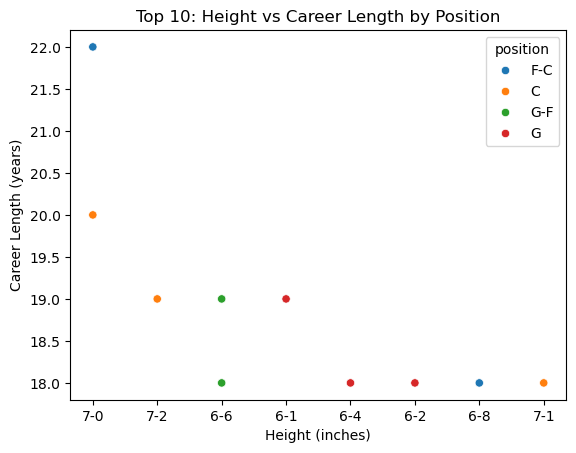

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 players with longest careers
top10_career = player_data_df.sort_values(by="career_length", ascending=False).head(10)

sns.scatterplot(data=top10_career, x="height", y="career_length", hue="position")
plt.title("Top 10: Height vs Career Length by Position")
plt.xlabel("Height (inches)")
plt.ylabel("Career Length (years)")
plt.show()


### 2. Performance Analysis 


#### Player Stats vs Age

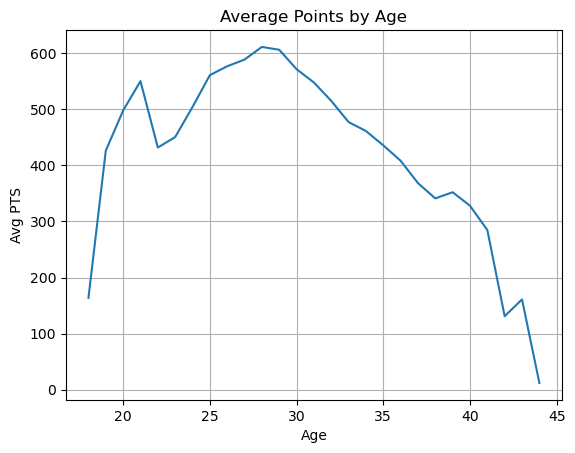

In [22]:
age_pts = season_stats_df.groupby("Age")["PTS"].mean()
age_pts.plot(kind='line', title="Average Points by Age", ylabel="Avg PTS", xlabel="Age")
plt.grid(True)
plt.show()


#### How does a player's physical attributes (height, weight) correlate with their on-court performance (Points, Assists)?



In [27]:
# Convert height like '6-2' to total inches
def convert_height_to_inches(height_str):
    try:
        feet, inches = height_str.split('-')
        return int(feet) * 12 + int(inches)
    except:
        return None  # In case of bad data

# Apply conversion
merged_df["height_inches"] = merged_df["height"].apply(convert_height_to_inches)

# Now select valid numeric columns for correlation
columns_to_check = ["height_inches", "weight", "PTS", "AST"]

# Convert all to numeric (just in case), then compute correlation
numeric_df = merged_df[columns_to_check].apply(pd.to_numeric, errors="coerce")
correlation_matrix = numeric_df.corr()

# Show the correlation matrix
print("Correlation between physical attributes and performance:")
print(correlation_matrix)


Correlation between physical attributes and performance:
               height_inches    weight       PTS       AST
height_inches       1.000000  0.819434 -0.041842 -0.370435
weight              0.819434  1.000000 -0.041704 -0.333228
PTS                -0.041842 -0.041704  1.000000  0.710173
AST                -0.370435 -0.333228  0.710173  1.000000


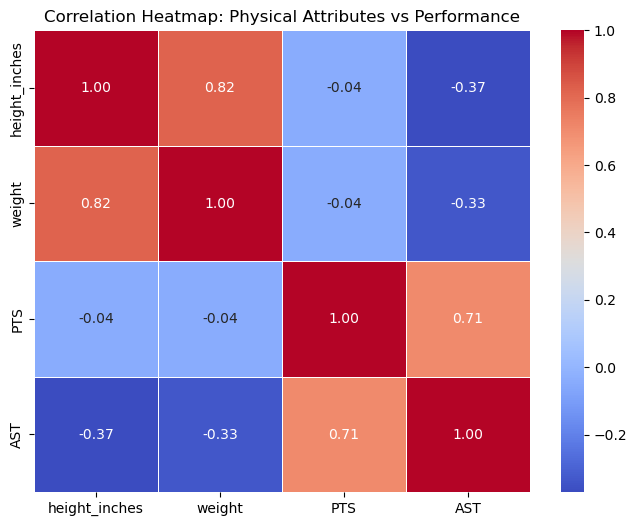

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert height like '6-2' to total inches
def convert_height_to_inches(height_str):
    try:
        feet, inches = height_str.split('-')
        return int(feet) * 12 + int(inches)
    except:
        return None  # Handle unexpected values

# Apply conversion
merged_df["height_inches"] = merged_df["height"].apply(convert_height_to_inches)

# Select relevant columns and convert to numeric
columns_to_check = ["height_inches", "weight", "PTS", "AST"]
numeric_df = merged_df[columns_to_check].apply(pd.to_numeric, errors="coerce")

# Drop rows with any NaN values in the selected columns
numeric_df = numeric_df.dropna()

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Physical Attributes vs Performance")
plt.show()


 #### correlation between physical and performance attributes.

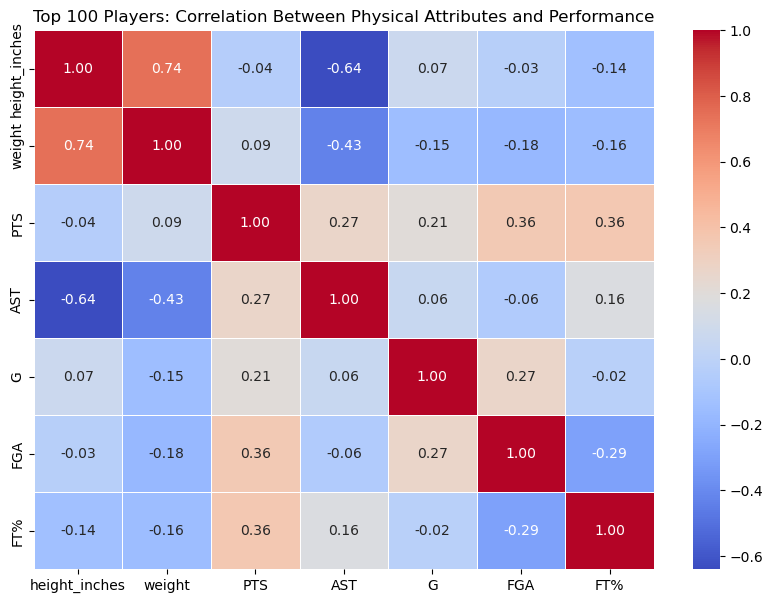

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to convert height to inches
def convert_height_to_inches(height_str):
    try:
        feet, inches = height_str.split('-')
        return int(feet) * 12 + int(inches)
    except:
        return None

# Apply height conversion
merged_df["height_inches"] = merged_df["height"].apply(convert_height_to_inches)

# Filter to Top 100 Players by Points
top_players = merged_df.sort_values(by="PTS", ascending=False).head(100)

# Select relevant physical and performance metrics
columns_to_check = ["height_inches", "weight", "PTS", "AST", "G", "FGA", "FT%"]

# Clean and convert to numeric
numeric_df = top_players[columns_to_check].apply(pd.to_numeric, errors="coerce").dropna()

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Top 100 Players: Correlation Between Physical Attributes and Performance")
plt.show()


#### Most Consistent Players (Lowest Std Dev in PTS)

In [30]:
pts_std = season_stats_df.groupby("Player")["PTS"].std().dropna().sort_values()
print("Top 10 Most Consistent Players (Lowest STD of PTS):")
print(pts_std.head(10))


Top 10 Most Consistent Players (Lowest STD of PTS):
Player
William Cunningham    0.0
Peter Thibeaux        0.0
Marcus Landry         0.0
Desmon Farmer         0.0
Ed Beach              0.0
Lee Johnson           0.0
Pepe Sanchez          0.0
Stephane Lasme        0.0
James Southerland     0.0
Dale Wilkinson        0.0
Name: PTS, dtype: float64


### 3. College Influence

#### Top Colleges by Average PTS

In [32]:
top_colleges = merged_df.groupby("college")["PTS"].mean().sort_values(ascending=False).head(10)
print("Top 10 Colleges by Average Points Scored:")
print(top_colleges)


Top 10 Colleges by Average Points Scored:
college
Gardner-Webb University                            1390.090909
Illinois Wesleyan University                       1234.785714
State University Of New York College At Buffalo    1208.928571
Trinity Valley Community College                   1096.214286
Marist College                                     1072.583333
Davidson College                                    936.500000
Aurora University                                   923.000000
University Of Wisconsin-Stevens Point               916.823529
Mount St. Mary'S University                         834.153846
Norfolk State University                            827.523810
Name: PTS, dtype: float64


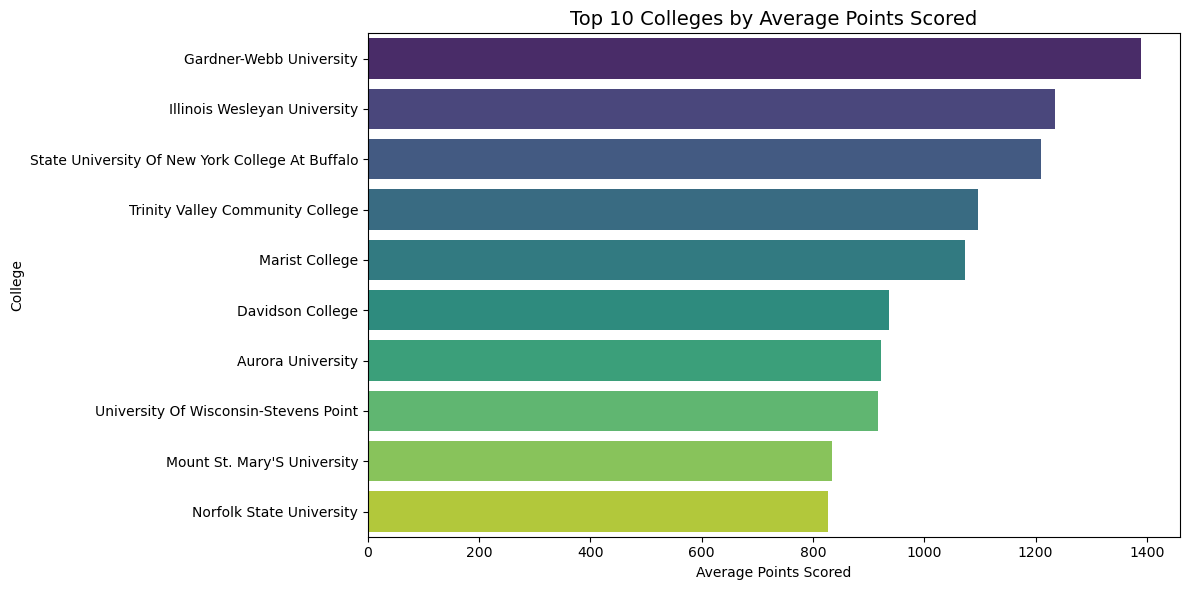

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate top 10 colleges by average points scored
top_colleges = merged_df.groupby("college")["PTS"].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for hue support
top_colleges_df = top_colleges.reset_index()
top_colleges_df.columns = ['college', 'avg_pts']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_colleges_df, x="avg_pts", y="college", hue="college", palette="viridis", dodge=False, legend=False)

plt.title("Top 10 Colleges by Average Points Scored", fontsize=14)
plt.xlabel("Average Points Scored")
plt.ylabel("College")
plt.tight_layout()
plt.show()


### 4. Outliers 

#### Outlier Detection Using Z-score

In [41]:
# Calculate Z-score for Points (PTS)
merged_df["PTS_zscore"] = (merged_df["PTS"] - merged_df["PTS"].mean()) / merged_df["PTS"].std()

# Identify outliers where the absolute Z-score > 3
outliers = merged_df[merged_df["PTS_zscore"].abs() > 3]

# Display top outliers
print("PTS Outliers:")
print(outliers[["Player", "PTS", "PTS_zscore"]])


PTS Outliers:
                   Player   PTS  PTS_zscore
1207        Willie Naulls  1846    3.127600
1280        Willie Naulls  1877    3.198274
1845         Walt Hazzard  1894    3.237031
2001            Don Kojis  1820    3.068324
2012       Kevin Loughery  1806    3.036407
...                   ...   ...         ...
20138  Karl-Anthony Towns  2061    3.617760
20153        Kemba Walker  1830    3.091123
20154           John Wall  1805    3.034127
20162   Russell Westbrook  2558    4.750827
20166      Andrew Wiggins  1933    3.325943

[181 rows x 3 columns]
